# MISSING VALUES-FEATURE ENGINEERING


What are the different types of Missing Data?

 Missing Completely at Random, MCAR: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [34]:
import pandas as pd
df=pd.read_csv('titanic.csv')

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
#This is the example of Missing Completely at Random
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


# MISSING DATA NOT AT RANDOM- SYSTEMATIC MISSING VALUES

there is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

Cabin and Age are example of Missing Data not at random

In [38]:
import numpy as np
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)

# find the percentage of null values
df['Cabin_null'].mean()

0.7710437710437711

In [39]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [40]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

So 87% of the data are missing from the non-survived and 60% are missing from the survived 

# MISSING AT RANDOM(MAR)

Men-hide their salary

Women-hide their Age

# All the technique for handling missing values

1.Mean-median-mode replacement

2.Random Sample Imputation

3.Capturing NAN values with a new feature

4.End of Distribution Imputation

5.Arbitrary Imputation

6.Frequent categories imputation


##Mean-Median-Mode Imputation

When should we apply?

Mean-Median imputation has the assumption that the data are missing completely at random(MCAR).We solve this be replacing NAN with the most frequent occurence of the variables

In [41]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [42]:
# Let's go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [43]:
def impute_nan(df,variables,median):
    df[variables+'_median']=df[variables].fillna(median)

In [44]:
median=df.Age.median()
median

28.0

In [45]:
impute_nan(df,'Age',median)

In [46]:
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [47]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


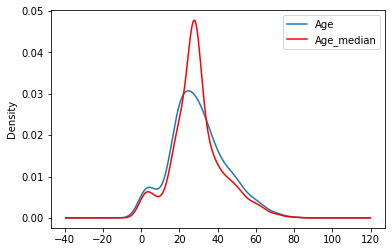

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure() 
ax = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax) 
df.Age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

Advantages:-

1.Easy to implement(Robust to outliers)

2.Faster way to obtain the complete dataset

Disadvantages

3.Change or Distortion in the original variance

4.Impacts Correlation

# Random Sample Imputation

Aim:-

Random Sample Imputation consists of taking random observation from the dataset and we use this observation to replace the nan
values

When it should be used:

I assume that data are missing completely at random(MCAR)

In [49]:
import pandas as pd
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [50]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [51]:
df['Age'].isnull().mean()

0.19865319865319866

In [52]:
# Here the nan values is replaced  by the random sample imputation
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [53]:
def impute_nan(df,variables,median):
    df[variables+'_median']=df[variables].fillna(median)
    df[variables+'_random']=df[variables]
    # It will have the random sample to fill the na
    random_sample=df[variables].dropna().sample(df[variables].isnull().sum(),random_state=0)
    ##pandas need to have same index to merge the dataset
    random_sample.index=df[df[variables].isnull()].index
    df.loc[df[variables].isnull(),variables+'_random']=random_sample

In [54]:
median=df.Age.median()
median

28.0

In [55]:
impute_nan(df,'Age',median)

In [56]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

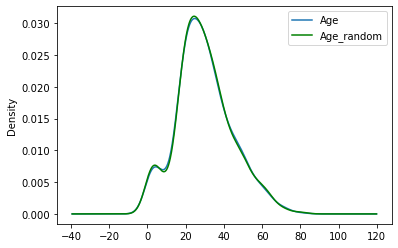

In [58]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=ax) 
df.Age_random.plot(kind='kde', ax=ax, color='green') 
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

ADVANTAGES:

1.Easy to implement

2.There is less distortion in variance

DISADVANTAGES:-

1.In every situation randomness won't work

# Capturing NAN Value with the new Feature
It work well if the data are missing completely at random(MCAR)

In [59]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [60]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [62]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [63]:
df.Age.median()

28.0

In [64]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [66]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


Advantages:-

1.Easy to implement

2.Capture the importance of missing values

DisAdvantages:-

1.It is creating Additional Feature(Curse of Dimensionality)

# END OF DISTRIBUTION IMPUTATION

In [67]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [75]:
median=df.Age.median()
median

28.0

<AxesSubplot:>

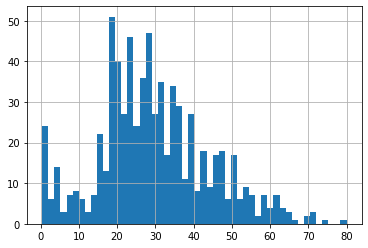

In [68]:
df.Age.hist(bins=50)

In [72]:
extreme_value=df.Age.mean()+3*df.Age.std()

In [76]:
def impute_nan(df,variable,median,extreme_value):
    df[variable+'_endofdist']=df[variable].fillna(extreme_value)
    df[variable].fillna(median,inplace=True)

In [77]:
impute_nan(df,'Age',median,extreme_value)

In [79]:
df.head(10)

,Survived,Age,Fare,Age_endofdist
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

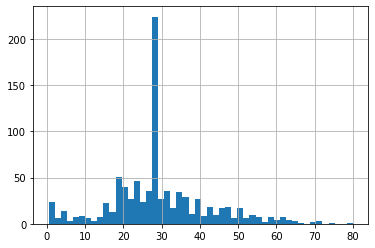

In [81]:
df.Age.hist(bins=50)

<AxesSubplot:>

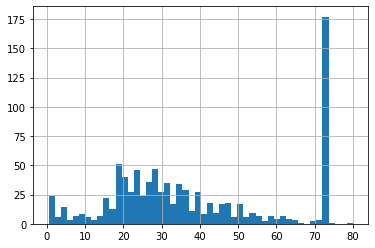

In [82]:
df.Age_endofdist.hist(bins=50)

<AxesSubplot:xlabel='Age_endofdist'>

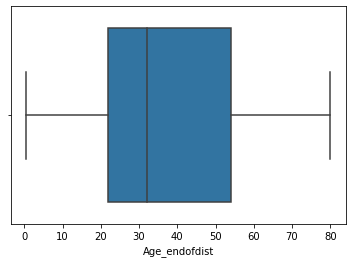

In [83]:
import seaborn as sns
sns.boxplot('Age_endofdist',data=df)

from this imputation we were sucessfully able to handle outliers

Advantages:-

1.Easy to implement

2.Capture the importance of missingness if there is one

DisAdvantages:-

1.Distort the original distribution of the variable

2.If missingness is not important,it may mask the predictive power of the original distribution by distortinng its distribution

3.If the number of NA is big,it will mask true outliers in the distribution

4.If the number of NA is small,the replaced NA may be considered an outlier and pre-processed in the subsequent feature 
engineering

# Abritary Imputation

It consists of replacing NAN by an abritary value.This technique was derived from kaggle competitions

In [84]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
